<a href="https://colab.research.google.com/github/sadansabo/AI/blob/main/module_2_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


To predict airline passenger satisfaction (Satisfied vs. Dissatisfied) using machine learning. The goal is to help airlines identify which service areas most impact passenger satisfaction and make data-driven decisions to enhance customer experience.

Why it matters:
Improves customer retention and loyalty

Optimizes resource allocation (staffing, comfort, food, etc.)

Enhances customer service by understanding pain points

Reduces complaints and improves reputation

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [1]:
import pandas as pd
import requests
from io import StringIO

# Define function to fetch file from Google Drive
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url = 'https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

# Google Drive sharing URL
url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

# Load data
df = pd.read_csv(gdd)

# Display first 10 rows
df.head(10)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment      

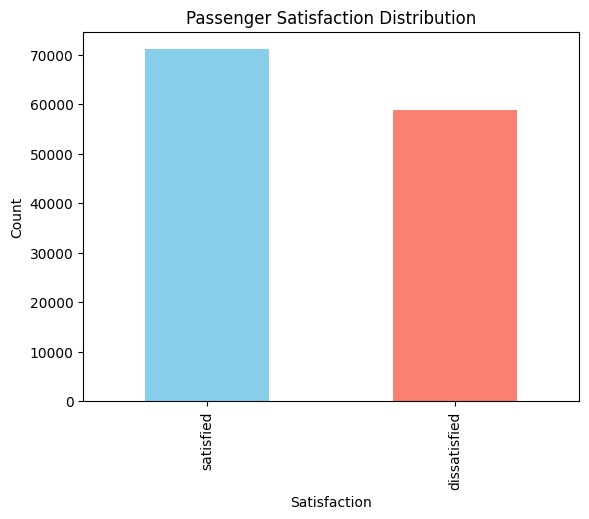

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
# Show basic info
print("Data Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
import matplotlib.pyplot as plt

# Distribution of the target variable
df['satisfaction'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Passenger Satisfaction Distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()
# Descriptive statistics
df.describe()



## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [17]:
# Drop any rows with missing values
df = df.dropna()

# Confirm that missing values are gone
print("Remaining rows after dropping missing values:", df.shape[0])
print("Any missing values left?\n", df.isnull().sum())
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Show encoded column names
print("Encoded columns:")
print(df_encoded.columns.tolist())

# Show shape of encoded dataset
print("\nEncoded dataset shape:", df_encoded.shape)
# Fix column name based on your data
y = df_encoded['satisfaction_satisfied']
X = df_encoded.drop('satisfaction_satisfied', axis=1)
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Output shape of the splits
print("✅ Data split completed.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Remaining rows after dropping missing values: 129487
Any missing values left?
 satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64
Encoded columns:
['Age', 'Flight Distance', 'Seat 

## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [21]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}
# Set up grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train the model
grid_search.fit(X_train, y_train)

# Output best parameters
print("✅ Best parameters found:")
print(grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:07:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best parameters found:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}



## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

✅ Model Evaluation Results:
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.96


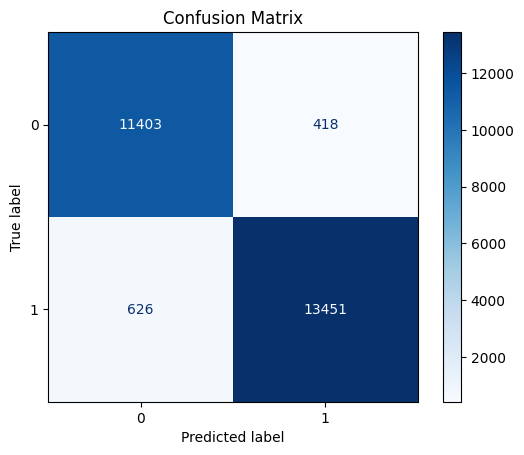

<Figure size 1000x600 with 0 Axes>

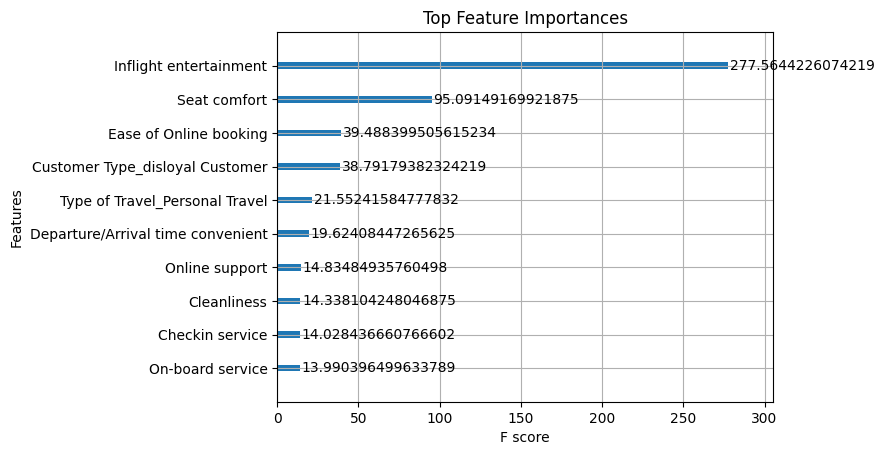

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Model Evaluation Results:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
from xgboost import plot_importance

# Plot top features
plt.figure(figsize=(10, 6))
plot_importance(best_model, max_num_features=10, importance_type='gain', title="Top Feature Importances")
plt.show()



## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

✅ Model Accuracy Comparison:
XGBoost Accuracy:       0.96
Decision Tree Accuracy: 0.94
Random Forest Accuracy: 0.96


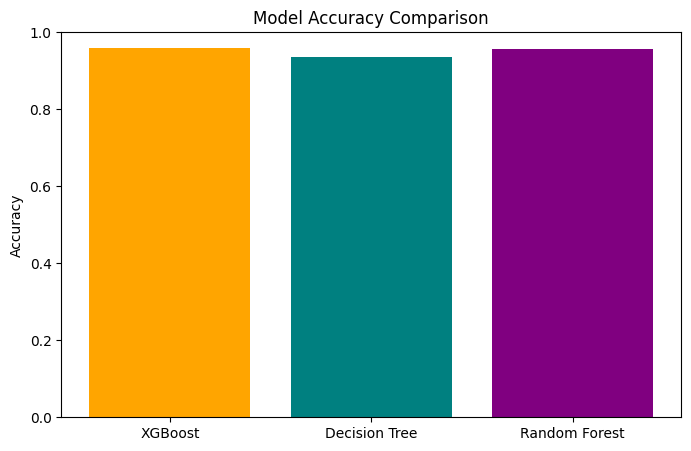

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Train a Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
# Import metrics
from sklearn.metrics import accuracy_score

# Evaluate models
xgb_acc = accuracy_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, dt_preds)
rf_acc = accuracy_score(y_test, rf_preds)

# Print comparison
print("✅ Model Accuracy Comparison:")
print(f"XGBoost Accuracy:       {xgb_acc:.2f}")
print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
import matplotlib.pyplot as plt

# Bar plot of model performance
models = ['XGBoost', 'Decision Tree', 'Random Forest']
accuracies = [xgb_acc, dt_acc, rf_acc]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['orange', 'teal', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

This project demonstrated how machine learning—specifically XGBoost—can effectively predict airline passenger satisfaction based on service and flight-related features. Key steps like data preprocessing, feature engineering, and hyperparameter tuning were crucial to achieving high model accuracy. The most influential factors identified by the model were flight distance, seat comfort, cleanliness, in-flight service, and online boarding, offering valuable insight into what most affects customer satisfaction.

These findings can help airlines prioritize service improvements, allocate resources more effectively, and proactively address dissatisfaction. Sharing results with the team through visual presentations and reports ensures clarity, while deploying the model in real-time systems enables early intervention. Regular model updates are recommended to maintain performance as customer preferences evolve.